# 1. Data Loading and Inspection

In [2]:

import pandas as pd

# Load the dataset
df = pd.read_csv('./Telco_Customer_Churn.csv')

# Display first few rows and check data types
print(df.head())
print(df.info())


   customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...               No   
1                No             DSL            Yes  ...              Yes   
2                No             DSL            Yes  ...               No   
3  No phone service             DSL            Yes  ...              Yes   
4                No     Fiber optic             No  ...               No   

  TechSupport StreamingTV StreamingMovies        Contract Pape

# 2. Exploratory Data Analysis (EDA)

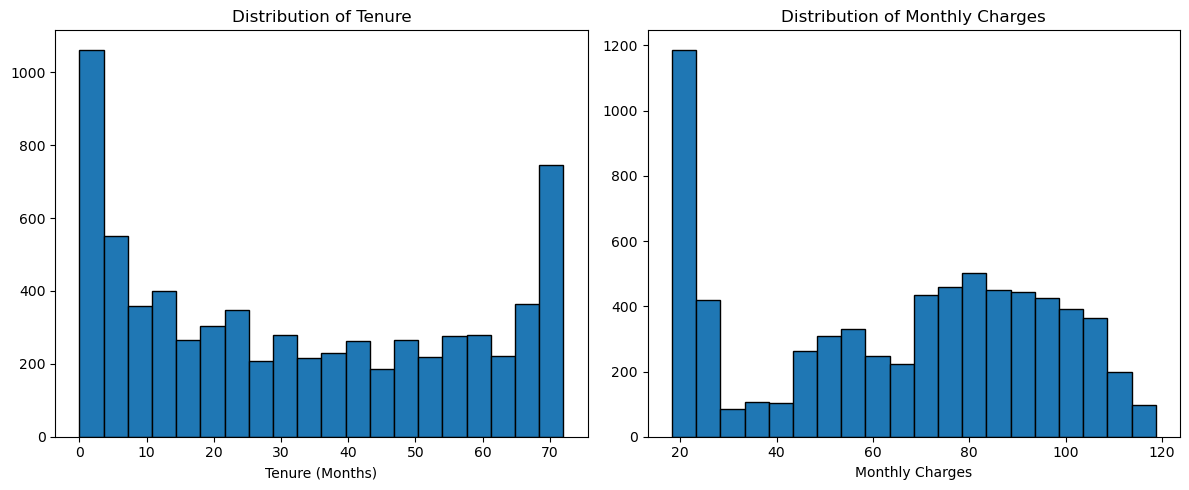

In [4]:

# Handling missing or incorrect values
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
df['TotalCharges'] = df['TotalCharges'].fillna(df['TotalCharges'].median())

# Visualize distributions of numerical features
import matplotlib.pyplot as plt

# Histograms for tenure and MonthlyCharges
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.hist(df['tenure'], bins=20, edgecolor='k')
plt.title('Distribution of Tenure')
plt.xlabel('Tenure (Months)')

plt.subplot(1, 2, 2)
plt.hist(df['MonthlyCharges'], bins=20, edgecolor='k')
plt.title('Distribution of Monthly Charges')
plt.xlabel('Monthly Charges')

plt.tight_layout()
plt.show()


# 3. Data Preprocessing

In [6]:

from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder

# Drop 'customerID' and separate target
df_clean = df.drop('customerID', axis=1)
X = df_clean.drop('Churn', axis=1)
y = df_clean['Churn'].map({'Yes': 1, 'No': 0})  # Encode target

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Preprocessing pipeline
numerical_features = X_train.select_dtypes(include=['int64', 'float64']).columns
categorical_features = X_train.select_dtypes(include=['object']).columns

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(drop='first'), categorical_features)
    ]
)
X_train_preprocessed = preprocessor.fit_transform(X_train)
X_test_preprocessed = preprocessor.transform(X_test)


# 4. Baseline Modeling

In [10]:

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, roc_auc_score

# Logistic regression model
model = LogisticRegression(max_iter=1000, random_state=42)
model.fit(X_train_preprocessed, y_train)
y_pred = model.predict(X_test_preprocessed)
y_pred_prob = model.predict_proba(X_test_preprocessed)[:, 1]

# Evaluation
print("Accuracy:", accuracy_score(y_test, y_pred))
print("AUC-ROC:", roc_auc_score(y_test, y_pred_prob))
print("Classification Report:", classification_report(y_test, y_pred))


Accuracy: 0.8211497515968772
AUC-ROC: 0.8621334375355824
Classification Report:               precision    recall  f1-score   support

           0       0.86      0.90      0.88      1036
           1       0.69      0.60      0.64       373

    accuracy                           0.82      1409
   macro avg       0.77      0.75      0.76      1409
weighted avg       0.82      0.82      0.82      1409



# 5. Advanced Modeling

In [12]:

from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC

# Define models
models = {
    "Random Forest": RandomForestClassifier(random_state=42),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42),
    "SVM": SVC(probability=True, random_state=42)
}

# Evaluate each model
for name, clf in models.items():
    clf.fit(X_train_preprocessed, y_train)
    y_pred = clf.predict(X_test_preprocessed)
    print(f"Model: {name}")
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("")


Model: Random Forest
Accuracy: 0.7899219304471257

Model: XGBoost
Accuracy: 0.7984386089425124



C:\Users\Unknown1\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [16:59:28] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0ed59c031377d09b8-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Model: SVM
Accuracy: 0.8105039034776437



# 6. Handling Class Imbalance

In [13]:

from imblearn.over_sampling import SMOTE

# SMOTE for class imbalance
smote = SMOTE(random_state=42)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train_preprocessed, y_train)
print("Class distribution after SMOTE:", pd.Series(y_train_balanced).value_counts())


Class distribution after SMOTE: Churn
0    4138
1    4138
Name: count, dtype: int64
